In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Matplotlib is building the font cache; this may take a moment.


# Colocation Maps

This dataset helps us identify where people colocated for every week. 

In [ ]:
aoi = ["NER", "NGA", "MLI", "BFA", "TCD", "DZA", "BEN", "LBY"]

In [269]:
import glob

colocation = pd.DataFrame()

for file in glob.glob("../../data/movement/meta/colocation_maps/*.csv"):
    df = pd.read_csv(file)
    df = df[df["country"].isin(aoi)]
    colocation = pd.concat([colocation, df])

In [21]:
niger_adm0 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm0_IGNN_20230720.shp"
)
niger_adm1 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm1_IGNN_20230720.shp"
)
niger_adm2 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm2_IGNN_20230720.shp"
)

In [40]:
niger_gadm = gpd.read_file("../../data/shapefiles/gadm/gadm41_NER_2.json")

In [135]:
libya = gpd.read_file(
    "../../data/shapefiles/libya/lby_admbnda_adm0_unosat_lbsc_20180507.shp"
)
nigeria = gpd.read_file(
    "../../data/shapefiles/nigeria/nga_admbnda_adm0_osgof_20190417.shp"
)
algeria = gpd.read_file(
    "../../data/shapefiles/algeria/dza_admbnda_adm0_unhcr_20200120.shp"
)
chad = gpd.read_file("../../data/shapefiles/chad/tcd_admbnda_adm0_ocha.shp")
mali = gpd.read_file("../../data/shapefiles/mali/mli_admbnda_adm0_1m_gov_20211220.shp")
burkinafaso = gpd.read_file(
    "../../data/shapefiles/burkinafaso/bfa_admbnda_adm0_igb_20200323.shp"
)

In [137]:
neighbors = pd.concat([libya, mali, chad, algeria, nigeria, burkinafaso])

In [33]:
niger = df[df["country"].isin(["NER"])]

array(['Tillabéry', 'Keita', 'Dosso', 'Madaoua', 'Tchighozerine',
       'Bkonni', 'Mirriah', 'Madarounfa', 'Tanout', 'Tahoua', 'Boboye',
       'Niamey', 'Groumdji', "N'Guigmi", 'Aguié', 'Magaria', 'Kollo',
       'Gouré', 'Loga', 'Gaya', 'Arlit', 'Tchin-Tabarade', 'Ouallam',
       'Dogon-Doutchi', 'Illéla', 'Maïné-Soroa', 'Dakoro', 'Say',
       'Filingué', 'Bilma', 'Bouza', 'Diffa', 'Tessaoua', 'Matameye',
       'Téra', 'Mayahi'], dtype=object)

In [51]:
niger = niger.merge(
    niger_gadm[["GID_2", "centroid"]], left_on="polygon1_id", right_on="GID_2"
)
niger.rename(columns={"centroid": "source_centroid"}, inplace=True)

In [52]:
niger = niger.merge(
    niger_gadm[["GID_2", "centroid"]], left_on="polygon2_id", right_on="GID_2"
)
niger.rename(columns={"centroid": "target_centroid"}, inplace=True)

In [54]:
niger.drop(columns=["GID_2_x", "GID_2_y"], inplace=True)

In [64]:
niger["source_lat"] = niger["source_centroid"].apply(lambda p: p.x)
niger["source_lon"] = niger["source_centroid"].apply(lambda p: p.y)

niger["target_lat"] = niger["target_centroid"].apply(lambda p: p.x)
niger["target_lon"] = niger["target_centroid"].apply(lambda p: p.y)

In [66]:
niger.to_csv("../../data/movement/meta/colocation_niger.csv")

In [115]:
commuting_zones = pd.read_excel(
    "../../data/movement/meta/commuting_zones/commuting_zones_niger.xlsx"
)

<iframe width="100%" height="500px" src="https://studio.foursquare.com/map/public/a9710c29-d74d-43c6-a907-b4f9e8d7050c/embed" frameborder="0" allowfullscreen></iframe>

# Commuting Zones

In [116]:
from shapely.wkt import loads

# WKT representation of the Polygon

# Create a Polygon geometry object from the WKT representation
commuting_zones["geometry"] = commuting_zones["GEOMETRY"].apply(lambda x: loads(x))

# Now, 'polygon' contains the Polygon geometry object

In [117]:
commuting_zones = gpd.GeoDataFrame(commuting_zones, geometry="geometry")

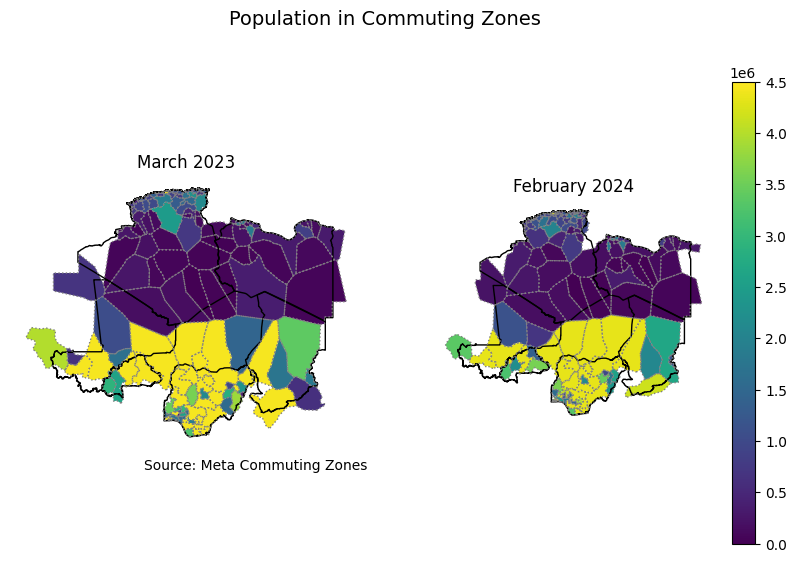

In [268]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
axs = ax.flatten()
neighbors.boundary.plot(ax=ax[0], color="black", linewidth=1)
commuting_zones[commuting_zones["ds"] == "2023-03-05"].boundary.plot(
    ax=ax[0], color="grey", linewidth=1, linestyle="dotted"
)
commuting_zones[commuting_zones["ds"] == "2023-03-05"].plot(
    ax=ax[0], column="win_population", cmap="viridis", vmin=0, vmax=4500000
)
# niger_adm0.plot(ax=ax[0], color='orange', alpha = 0.5)
ax[0].set_title("March 2023")

neighbors.boundary.plot(ax=ax[1], color="black", linewidth=1)
commuting_zones[commuting_zones["ds"] == "2024-02-04"].boundary.plot(
    ax=ax[1], color="grey", linewidth=1, linestyle="dotted"
)
im = commuting_zones[commuting_zones["ds"] == "2024-02-04"].plot(
    ax=ax[1], column="win_population", cmap="viridis", vmin=0, vmax=4500000, legend=True
)
# niger_adm0.plot(ax=ax[1], color='orange', alpha = 0.5)
ax[1].set_title("February 2024")

# cax = fig.add_axes([0.93, 0.2, 0.02, 0.6])  # Adjust position and size as needed
# cbar = colorbar(im, cax=cax)
# cbar.set_label('Population')  # Set label for the colorbar

# # Customize tick labels if needed
# cbar.ax.tick_params(labelsize=10)

# # Hide the original legend
# im.set_visible(False)

for i in [0, 1]:
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)

ax[0].text(0, 0, "Source: Meta Commuting Zones")

plt.suptitle("Population in Commuting Zones", x=0.5, y=1, fontsize=14);

## Observations and Limitations 
- If Facebook drew the borders for Niger, some regions would coincide with its neighboring countries. For instance, the northern regions of Niger have commuting zones overlapping with Algeria, and some of the southern regions have overlaps with Nigeria. 
- Between 2023 and 2024, there are not many significant changes in the commuting zones. However, there are differences in the number of people residing in them. 

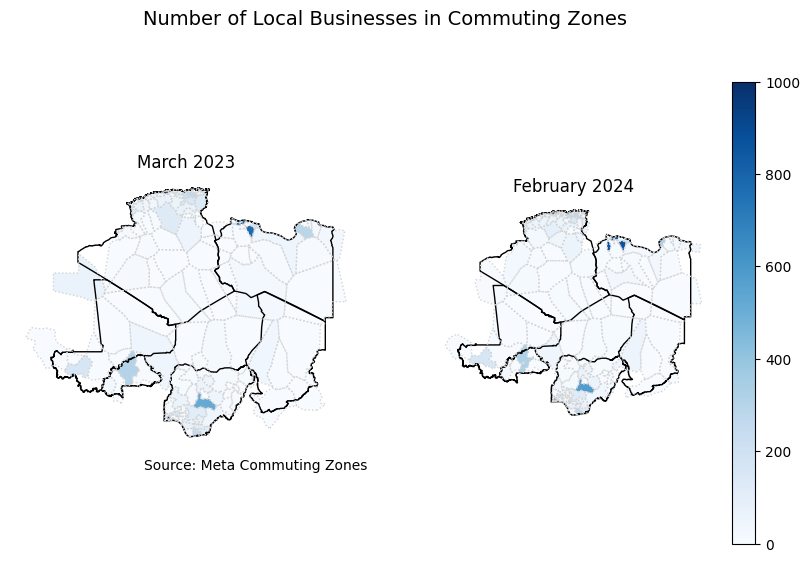

In [265]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
axs = ax.flatten()

neighbors.boundary.plot(ax=ax[0], color="black", linewidth=1)
commuting_zones[commuting_zones["ds"] == "2023-03-05"].boundary.plot(
    ax=ax[0], color="lightgrey", linewidth=1, linestyle="dotted"
)
commuting_zones[commuting_zones["ds"] == "2023-03-05"].plot(
    ax=ax[0], column="local_business_locations_count", cmap="Blues", vmin=0, vmax=1000
)
# niger_adm0.plot(ax=ax[0], color='orange', alpha = 0.5)
ax[0].set_title("March 2023")

neighbors.boundary.plot(ax=ax[1], color="black", linewidth=1)
commuting_zones[commuting_zones["ds"] == "2024-02-04"].boundary.plot(
    ax=ax[1], color="lightgrey", linewidth=1, linestyle="dotted"
)
im = commuting_zones[commuting_zones["ds"] == "2024-02-04"].plot(
    ax=ax[1],
    column="local_business_locations_count",
    cmap="Blues",
    vmin=0,
    vmax=1000,
    legend=True,
)
# niger_adm0.plot(ax=ax[1], color='orange', alpha = 0.5)
ax[1].set_title("February 2024")

# Remove colorbar
# plt.colorbar(im).remove()

# # Plot colorbar with custom size
# cbar = plt.colorbar(im, ax=ax[1], shrink=0.5)  # Adjust shrink parameter for size
# cbar.ax.tick_params(labelsize=10)  # Adjust label font size

# colorbar = plt.colorbar(im)
# colorbar.figure.set_size_inches(2, 2)

# cbar = fig.colorbar(im, ax=ax[1])

for i in [0, 1]:
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)

ax[0].text(0, 0, "Source: Meta Commuting Zones")

plt.suptitle("Number of Local Businesses in Commuting Zones", x=0.5, y=1, fontsize=14);